<a href="https://colab.research.google.com/github/Rambe01/Titanic-data/blob/main/TitanicData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pandas

In [4]:
!pip install seaborn
!pip install matplotlib.pyplot

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn styling (fix for older plt.style.use('seaborn'))
sns.set_theme()

# Load dataset
df = pd.read_csv("tested.csv")  # Change path if needed
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print("Shape of dataset:", df.shape)

print("\n--- Info ---")
print(df.info())

print("\n--- Describe ---")
print(df.describe(include='all').T)

print("\n--- Missing Values ---")
print(df.isnull().sum().sort_values(ascending=False))


Shape of dataset: (418, 12)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None

--- Describe ---
             count unique                       top freq       mean  \
PassengerId  418.0    NaN                       NaN  NaN     1100.5   
Survived     418.0    NaN            

In [7]:
cat_cols = [c for c in df.columns if df[c].dtype == 'object' or df[c].nunique() < 20]

for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts(dropna=False))



Value counts for Survived:
Survived
0    266
1    152
Name: count, dtype: int64

Value counts for Pclass:
Pclass
3    218
1    107
2     93
Name: count, dtype: int64

Value counts for Name:
Name
Peter, Master. Michael J                        1
Kelly, Mr. James                                1
Gale, Mr. Harry                                 1
Bonnell, Miss. Caroline                         1
Conlon, Mr. Thomas Henry                        1
                                               ..
Connolly, Miss. Kate                            1
Svensson, Mr. Johan Cervin                      1
Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1
Wirz, Mr. Albert                                1
Myles, Mr. Thomas Francis                       1
Name: count, Length: 418, dtype: int64

Value counts for Sex:
Sex
male      266
female    152
Name: count, dtype: int64

Value counts for SibSp:
SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64

Value counts 

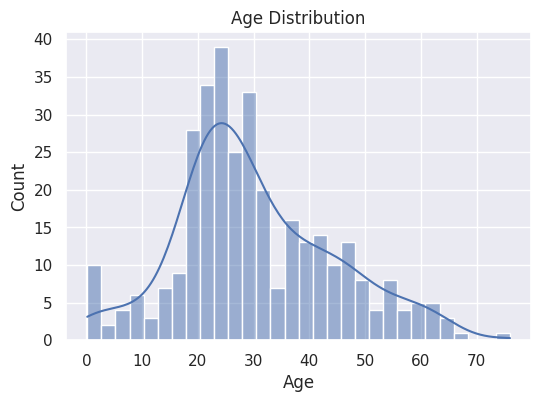

In [8]:
if "Age" in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df['Age'], bins=30, kde=True)
    plt.title("Age Distribution")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.show()


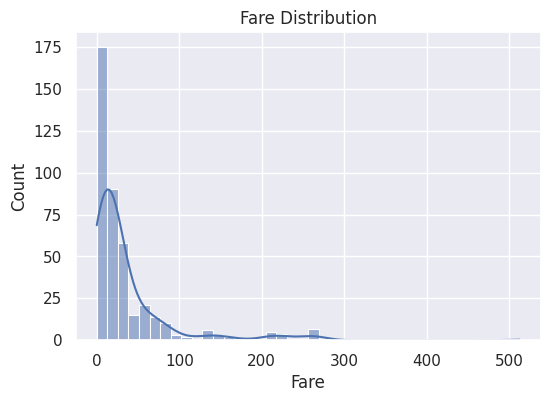

In [9]:
if "Fare" in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df['Fare'], bins=40, kde=True)
    plt.title("Fare Distribution")
    plt.xlabel("Fare")
    plt.ylabel("Count")
    plt.show()


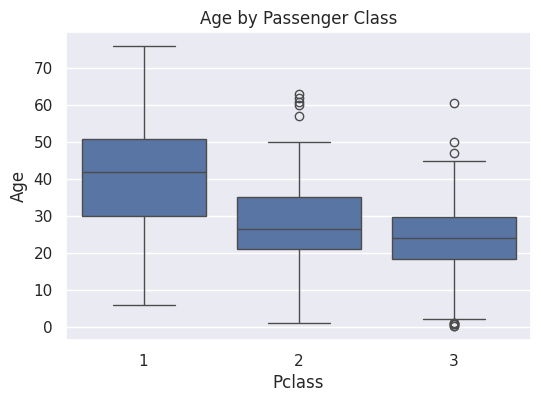

In [10]:
if {"Age", "Pclass"}.issubset(df.columns):
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Pclass', y='Age', data=df)
    plt.title("Age by Passenger Class")
    plt.show()


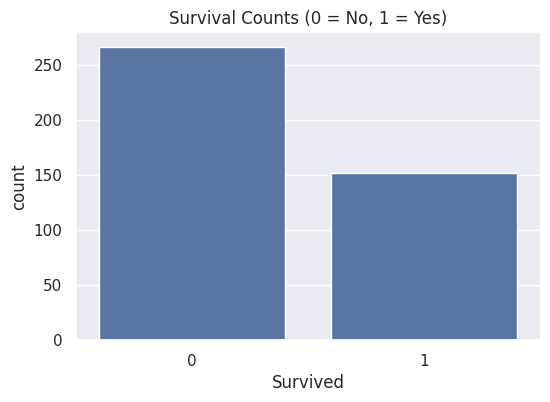

In [11]:
if "Survived" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='Survived', data=df)
    plt.title("Survival Counts (0 = No, 1 = Yes)")
    plt.show()


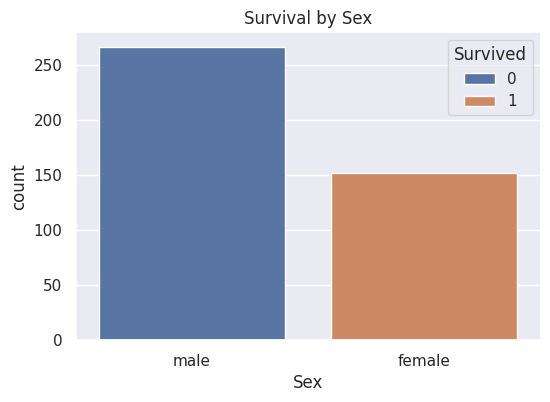

In [12]:
if {"Survived", "Sex"}.issubset(df.columns):
    plt.figure(figsize=(6,4))
    sns.countplot(x='Sex', hue='Survived', data=df)
    plt.title("Survival by Sex")
    plt.show()


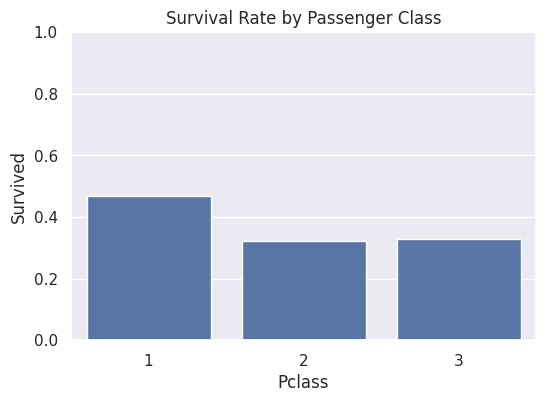

In [13]:
if {"Survived", "Pclass"}.issubset(df.columns):
    survival_rate = df.groupby('Pclass')['Survived'].mean().reset_index()
    plt.figure(figsize=(6,4))
    sns.barplot(x='Pclass', y='Survived', data=survival_rate)
    plt.ylim(0, 1)
    plt.title("Survival Rate by Passenger Class")
    plt.show()


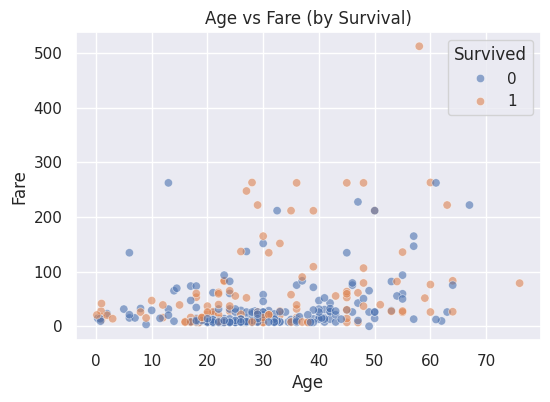

In [14]:
if {"Age", "Fare", "Survived"}.issubset(df.columns):
    plt.figure(figsize=(6,4))
    sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, alpha=0.6)
    plt.title("Age vs Fare (by Survival)")
    plt.show()


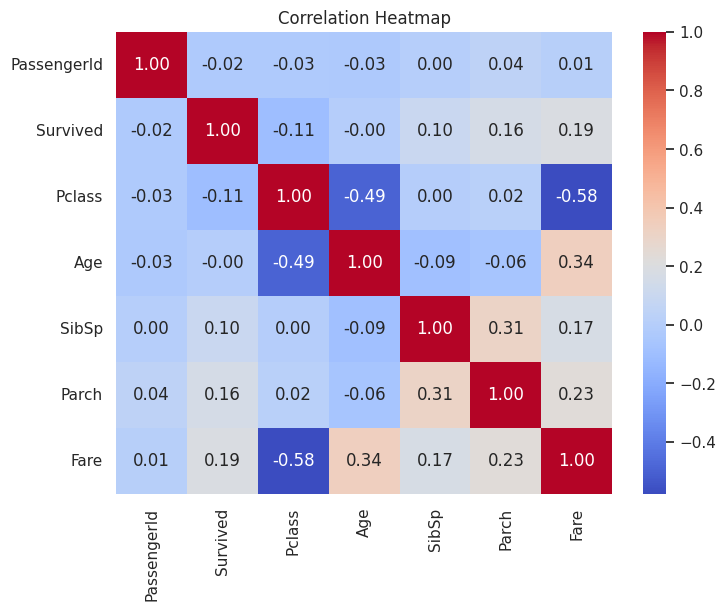

In [15]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 1:
    plt.figure(figsize=(8,6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()


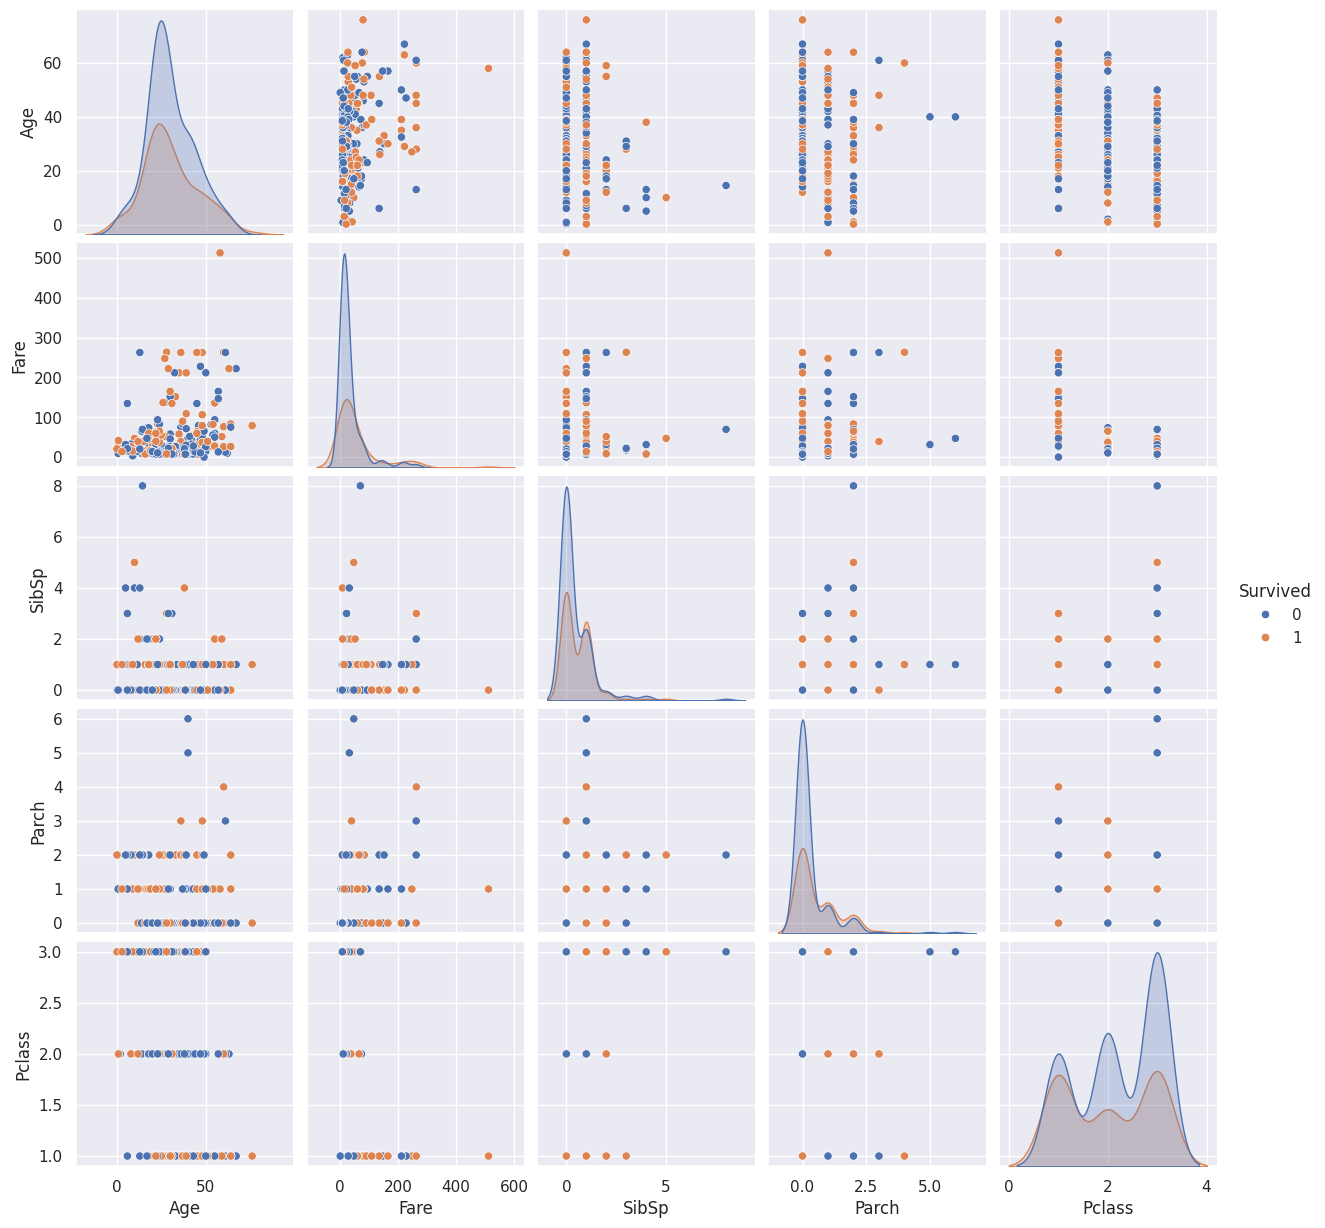

In [16]:
selected = [c for c in ['Age','Fare','SibSp','Parch','Survived','Pclass'] if c in df.columns]
if len(selected) >= 2:
    sns.pairplot(df[selected].dropna(), hue='Survived' if 'Survived' in selected else None)
    plt.show()


## Observations
- Age distribution peaks between 20–40 years old.
- Fare distribution is highly skewed; some very expensive tickets exist.
- Females had a higher survival rate than males.
- Higher class passengers had higher survival rates.
